In [0]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-05-18 04:06:48--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.80.48, 104.31.81.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.80.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-05-18 04:06:48 (9.61 MB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [0]:
df =df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns =['labels','data']

In [10]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df['b_labels'] = df['labels'].map({'ham':0,'spam':1})
Y = df['b_labels'].values

In [0]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'],Y, test_size=0.33)

In [0]:
# Convet setences to sequence
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [14]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7259 unique tokens.


In [24]:
word2idx.items()

dict_items([('i', 1), ('to', 2), ('you', 3), ('a', 4), ('the', 5), ('u', 6), ('and', 7), ('in', 8), ('is', 9), ('me', 10), ('my', 11), ('your', 12), ('for', 13), ('of', 14), ('it', 15), ('call', 16), ('have', 17), ('on', 18), ('that', 19), ('are', 20), ('2', 21), ('so', 22), ('now', 23), ('or', 24), ('but', 25), ('not', 26), ('at', 27), ('be', 28), ('will', 29), ("i'm", 30), ('just', 31), ('get', 32), ('do', 33), ('can', 34), ('with', 35), ('ur', 36), ('no', 37), ('this', 38), ('if', 39), ('we', 40), ('gt', 41), ('when', 42), ('lt', 43), ('from', 44), ('up', 45), ('4', 46), ('ok', 47), ('out', 48), ('know', 49), ('all', 50), ('what', 51), ('how', 52), ('go', 53), ('got', 54), ('like', 55), ('free', 56), ('was', 57), ('day', 58), ('good', 59), ('then', 60), ('come', 61), ('am', 62), ('its', 63), ('there', 64), ('time', 65), ('send', 66), ('love', 67), ('only', 68), ('text', 69), ('as', 70), ('want', 71), ("i'll", 72), ('he', 73), ('by', 74), ('going', 75), ('r', 76), ('home', 77), ('sor

In [25]:
# Pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [26]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [0]:
# Create the model

#We get to choose embedding dimensionality
D=20

# Hidden state dimensionality
M =15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0
# Thus, if the final index of the enbedding matrix is V,
# then it actually must have size V+1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [32]:
# Compile and fit
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print('Trainin model...')
r = model.fit(
    data_train,
    Ytrain,
    epochs=10,
    validation_data=(data_test,Ytest),
)

Trainin model...
Epoch 1/10
117/117 [==============================] - 9s 79ms/step - loss: 0.4662 - accuracy: 0.8580 - val_loss: 0.3983 - val_accuracy: 0.8630
Epoch 2/10
117/117 [==============================] - 9s 76ms/step - loss: 0.3783 - accuracy: 0.8674 - val_loss: 0.3270 - val_accuracy: 0.8630
Epoch 3/10
117/117 [==============================] - 9s 75ms/step - loss: 0.2395 - accuracy: 0.8738 - val_loss: 0.1874 - val_accuracy: 0.9347
Epoch 4/10
117/117 [==============================] - 9s 77ms/step - loss: 0.1367 - accuracy: 0.9829 - val_loss: 0.1107 - val_accuracy: 0.9810
Epoch 5/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0752 - accuracy: 0.9901 - val_loss: 0.0754 - val_accuracy: 0.9869
Epoch 6/10
117/117 [==============================] - 9s 75ms/step - loss: 0.0446 - accuracy: 0.9938 - val_loss: 0.0562 - val_accuracy: 0.9891
Epoch 7/10
117/117 [==============================] - 9s 77ms/step - loss: 0.0296 - accuracy: 0.9946 - val_loss: 0.0479 - val

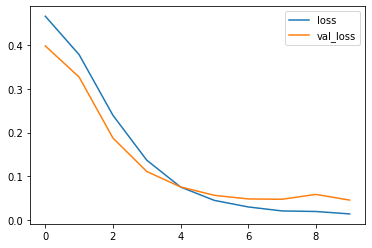

In [33]:
# plot loss per iteration
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

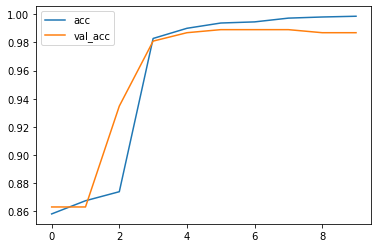

In [34]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [37]:
tf.constant([1,2,3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

Confusion matrix, without normalization
[[1586    1]
 [  23  229]]


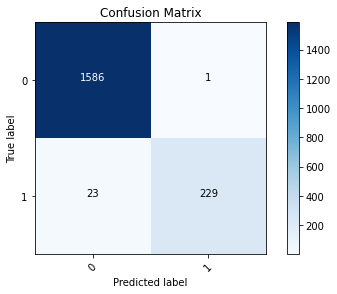

In [53]:
#Plot confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True.
  """

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print ('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm,interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh= cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color ='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = np.around(model.predict(data_test))
p_test2 = model.predict(data_test)
cm = confusion_matrix(Ytest,p_test)
plot_confusion_matrix(cm,list(range(2)))

In [83]:
#Show the misclassified examples
misclassified_idx = np.where(p_test != Ytest.reshape(-1,1))[0]
i = np.random.choice(misclassified_idx)
print(df['data'].values[i])
print('True Label: %d    Predicted: %d' % (Ytest[i], p_test[i]))

I wanted to ask Ì_ to wait 4 me to finish lect. Cos my lect finishes in an hour anyway.
True Label: 0    Predicted: 1
